<a href="https://colab.research.google.com/github/Sergio432/IA-s-IB-2022-ordinary-class/blob/main/PIA_ArtificialIntelligence_BrainTumorDetection(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PIA_ArtificialIntelligence_BrainTumorDetection(CNN)**
####**UANL-FIME      Artificial Intelligence     Daniel Perez Alcantar**

Biomedical Engineering Plan:420
*   Sergio Alejandro González García    #1992165
*   Raquel Jackeline Avila Blnaco       #1991874
*   José Javier Cordero De La Sota #1885481
*   Natalia Jiménez Fraire #1992135	
*   Ana Lourdes Soto Guerrero #1992185
  
11/2022

### Import TensorFlow

> Bloc con sangría



In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from zipfile import ZipFile #Para la descarga de los archivos Zip de Kaggle

import os, glob #para trabajar los archivos descargados
import cv2

from keras import models
from keras import layers
from keras.models import Sequential

import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Librerías a utilizar
import matplotlib.pyplot as plt # generar gráficos
import numpy as np # generar arreglos
import pandas as pd # cargar conjuntos de datos externos
import sklearn.linear_model # contiene diferentes modelos de ML

###Download and prepare the dataset from kaggle


In [ ]:
#install Kaggle using an API
!pip install -q kaggle
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
  #it crates a kaggle folder  and gives permision for jason to act
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 86% 13.0M/15.1M [00:02<00:00, 8.65MB/s]
100% 15.1M/15.1M [00:02<00:00, 5.91MB/s]


In [ ]:
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip" #Archico de donde se extraeran datos

with ZipFile(file_name,'r') as zip: #Extrae todos los archivos del zip
  zip.extractall()
  print('Done')

Done


In [ ]:
MAIN_DIR = "/content/brain_tumor_dataset"
SEED = 40
os.listdir(MAIN_DIR)

['no', 'yes']

In [ ]:
subdirs = os.listdir(MAIN_DIR)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(MAIN_DIR+'/'+subdir))} images")

no contains 98 images
yes contains 155 images


In [ ]:
def load_images(folder):    
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels

data, labels = load_images(MAIN_DIR)
data.shape, labels.shape

((253, 128, 128, 3), (253,))

**Visualization**

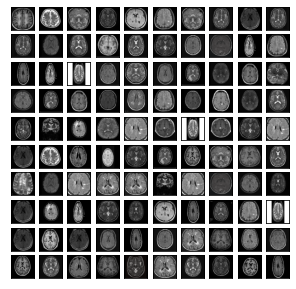

In [ ]:
plt.figure(figsize=(5,5))
for i in range(100):
    plt.subplot(10,10, i+1)
    idx = np.random.randint(0, 97) #98 imágenes de NO
    plt.imshow(data[idx], cmap='gray')
    plt.xticks([])
    plt.yticks([])

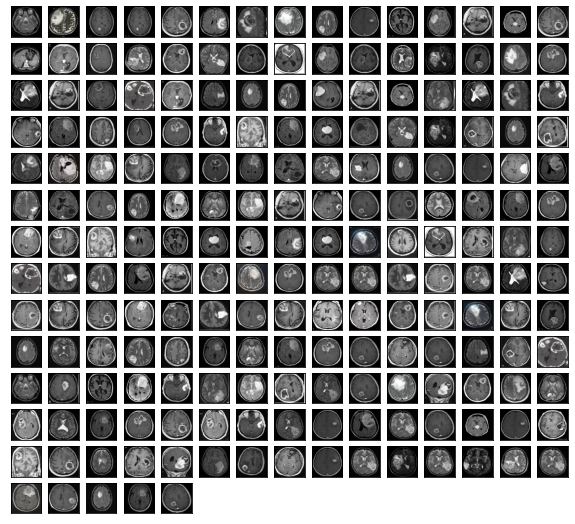

In [ ]:
plt.figure(figsize=(10,10))
for i in range(200):
    plt.subplot(15,15, i+1)
    idx = np.random.randint(98, 252) #155 imágnes de YES
    plt.imshow(data[idx], cmap='gray')
    plt.xticks([])
    plt.yticks([])

**Data normalization**

In [ ]:
norm_data = data / 255. 
norm_data.shape, norm_data[0]

((253, 128, 128, 3), array([[[0.01176471, 0.01176471, 0.01176471],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.10196078, 0.09019608, 0.09411765],
         [0.13333333,

### Create the convolutional base

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

**Add Dense layers on top**


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(norm_data, labels, epochs=10, validation_split=0.20)

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 1.1519 - accuracy: 0.4653 - val_loss: 0.7101 - val_accuracy: 0.5686
Epoch 2/10
7/7 [==============================] - 6s 828ms/step - loss: 0.5964 - accuracy: 0.6782 - val_loss: 0.3615 - val_accuracy: 0.9216
Epoch 3/10
7/7 [==============================] - 6s 818ms/step - loss: 0.4792 - accuracy: 0.7574 - val_loss: 0.4516 - val_accuracy: 0.9020
Epoch 4/10
7/7 [==============================] - 6s 819ms/step - loss: 0.4052 - accuracy: 0.8168 - val_loss: 0.6097 - val_accuracy: 0.8627
Epoch 5/10
7/7 [==============================] - 6s 807ms/step - loss: 0.3432 - accuracy: 0.8663 - val_loss: 0.9371 - val_accuracy: 0.6863
Epoch 6/10
7/7 [==============================] - 6s 809ms/step - loss: 0.3420 - accuracy: 0.8614 - val_loss: 0.2965 - val_accuracy: 0.9608
Epoch 7/10
7/7 [==============================] - 6s 797ms/step - loss: 0.2955 - accuracy: 0.8960 - val_loss: 0.6335 - val_accuracy: 0.8039
Epoch 8/10
7/7 [=======

### Evaluation

In [ ]:
result = model.evaluate(norm_data, labels, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 94.07%
Loss: 0.2158


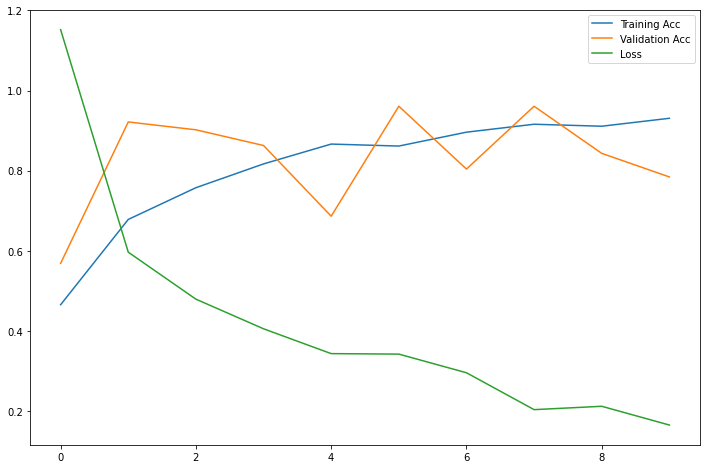

In [ ]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(12,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(norm_data)

8/8 [==============================] - 2s 225ms/step


In [ ]:
predictions[0]

array([ 1.6474868, -2.4202988], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

1

In [ ]:
class_names = ['no','yes']

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100-10*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

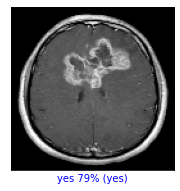

In [ ]:
i = np.random.randint(0, 252)
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], labels, norm_data)
plt.show()

<Figure size 720x720 with 0 Axes>

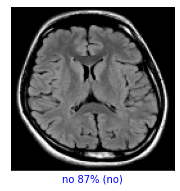

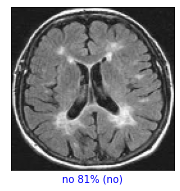

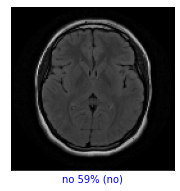

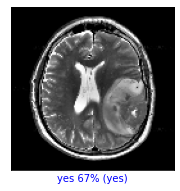

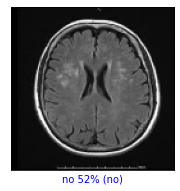

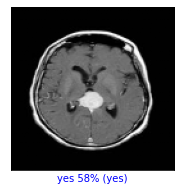

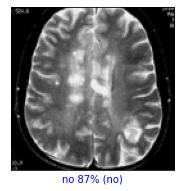

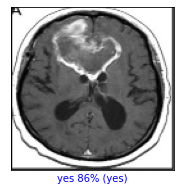

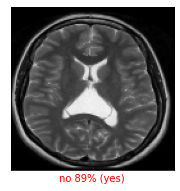

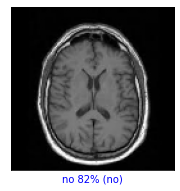

In [ ]:
plt.figure(figsize=(10,10))
for n in range(10):
    i = np.random.randint(0, 252)
    plt.figure(figsize=(6,3))
    plot_image(i, predictions[i], labels, norm_data)
    plt.show()